## 17.1 UI 준비하기
- 프레젠테이셔널 컴포넌트와 컨테이너 컴포넌트를 분리
- 필수 사항은 아니다
1. 카운터 컴포넌트 만들기
```js
import React from 'react';

const Counter = ({ number, onIncrease, onDecrease }) => {
    return (
        <div>
            <h1>{number}</h1>
            <div>
                <button onClick={onIncrease}>+1</button>
                <button onClick={onDecrease}>-1</button>
            </div>
        </div>
    );
};

export default Counter;
```
---
```js
import React from 'react';
import Counter from './components/Counter';

const App = () => {
  return (
    <div>
      <Counter number={0} />
    </div>
  );
};

export default App;
```
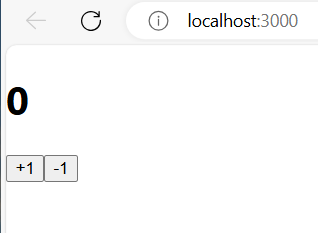

2. 할 일 목록 컴포넌트 만들기
```js
import React from 'react';

const TodoItem = ({ todo, onToggle, onRemove }) => {
    return (
        <div>
            <input
                type="checkbox"
            />
            <span>예제 텍스트</span>
            <button>삭제</button>
        </div>
    );
};

const Todos = ({
    // 인풋에 입력되는 텍스트
    input, 
    // 할 일 목록이 들어있는 객체
    todos, 
    onChangeInput,
    onInsert,
    onToggle,
    onRemove,
}) => {
    const onSubmit = e => {
        e.preventDefault();
    };
    
    return (
        <div>
            <form onSubmit={onSubmit}>
                <input />
                <button type="submit">등록</button>
            </form>
            <div>
                <TodoItem />
                <TodoItem />
                <TodoItem />
            </div>
        </div>
    );
};

export default Todos;
```
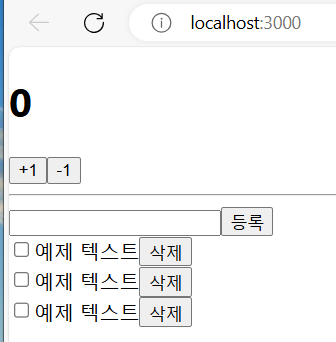

## 17.2 리덕스 관련 코드 작성하기
1. counter 모듈 작성하기
- 액션 타입 정의하기
    ```js
    const INCREASE = 'counter/INCREASE';
    const DECREASE = 'counter/DECREASE';
    ```
- 액션 생성 함수 만들기
    ```js
    (...)
    export const increase = createAction(INCREASE);
    export const decrease = createAction(DECREASE);
    ```
- 초기 상태 및 리듀서 함수 만들기
```js
const INCREASE = 'counter/INCREASE';
const DECREASE = 'counter/DECREASE';

export const increase = () => ({ type: INCREASE });
export const decrease = () => ({ type: DECREASE });

const initialState = {
    number: 0
};

function counter(state = initialState, action) {
    switch (action.type) {
        case INCREASE:
            return {
                number: state.number + 1
            };
        case DECREASE:
            return {
                number: state.number - 1
            };
        default:
            return state;
    }
}

export default counter;
```

2. todos 모듈 만들기
- 액션 타입 정의하기
- 액션 생성 함수 만들기
- 초기 상태 및 리듀서 함수 만들기
```js
// 인풋 값을 변경
const CHANGE_INPUT = 'todos/CHANGE_INPUT'; 
// 새로운 todo 를 등록
const INSERT = 'todos/INSERT'; 
// todo 를 체크/체크해제
const TOGGLE = 'todos/TOGGLE'; 
// todo 를 제거
const REMOVE = 'todos/REMOVE'; 

export const changeInput = input => ({
    type: CHANGE_INPUT,
    input
})

// insert 가 호출될 때마다 1식 증가
let id = 3
export const insert = text => ({
    type: INSERT,
    todo:{
        id : id++,
        text,
        done:false
    }
})

export const toggle = id => ({
    type:TOGGLE,
    id
})

export const remove = id => ({
    type:REMOVE,
    id
})

const initialState = {
    input:'',
    todos:[
        {
            id:1,
            text:'리덕스 기초 배우기',
            done:true
        },
        {
            id:2,
            text:'리액트와 리덕스 사용',
            done:false

        }
    ]
}

function todos(state = initialState, action) {
    switch (action.type) {
        case CHANGE_INPUT:
            return {
            ...state,
            input: action.input,
            };
        case INSERT:
            return {
            ...state,
            todos: state.todos.concat(action.todo),
            };
        case TOGGLE:
            return {
            ...state,
            todos: state.todos.map((todo) =>
                todo.id === action.id ? { ...todo, done: !todo.done } : todo,
            ),
            };
        case REMOVE:
            return {
            ...state,
            todos: state.todos.filter((todo) => todo.id !== action.id),
            };
        default:
            return state;
    }
}
  
export default todos;
```

3. 루트 리듀서 만들기
- 파일 이름은 index.js로 설정하면 나중에 불러올 때 디렉터리 이름까지만 입력하여 불러올 수 있다.
```js
import { combineReducers } from 'redux';
import counter from './counter';
import todos from './todos';

const rootReducer = combineReducers({
    counter,
    todos,
});

export default rootReducer;
```

## 17.3 리액트 애플리케이션에 리덕스 적용하기
1. 스토어 만들기
```js
import React from 'react';
import ReactDOM from 'react-dom/client';
import './index.css';
import App from './App';
import { createStore } from 'redux'
import rootReducer from './modules';

const store = createStore(rootReducer)

const root = ReactDOM.createRoot(document.getElementById('root'));
root.render(<App />);
```

2. Provider 컴포넌트를 사용하여 프로젝트에 리덕스 적용하기
- 리액트 컴포넌트에서 스토어를 사용할 수 있도록 App 컴포넌트를 react-redux에서 제공하는 Provider 컴포넌트로 감싸 줍니다.
- 이 컴포넌트를 사용할 때는 store를 props로 전달해 주어야 합니다.
```js
import React from 'react';
import ReactDOM from 'react-dom/client';
import './index.css';
import App from './App';
import { createStore } from 'redux'
import rootReducer from './modules';
import { Provider } from 'react-redux'

const store = createStore(rootReducer)

const root = ReactDOM.createRoot(document.getElementById('root'));
root.render(
  <Provider store={store}>
    <App />
  </Provider>
);
```

3.  Redux DevTools의 설치 및 적용
- yarn add redux-devtools-extension
```js
import React from 'react';
import ReactDOM from 'react-dom/client';
import './index.css';
import App from './App';
import { createStore } from 'redux'
import rootReducer from './modules';
import { Provider } from 'react-redux'
import { devToolsEnhancer } from '@redux-devtools/extension'

const store = createStore(rootReducer, devToolsEnhancer())

const root = ReactDOM.createRoot(document.getElementById('root'));
root.render(
  <Provider store={store}>
    <App />
  </Provider>
);
```
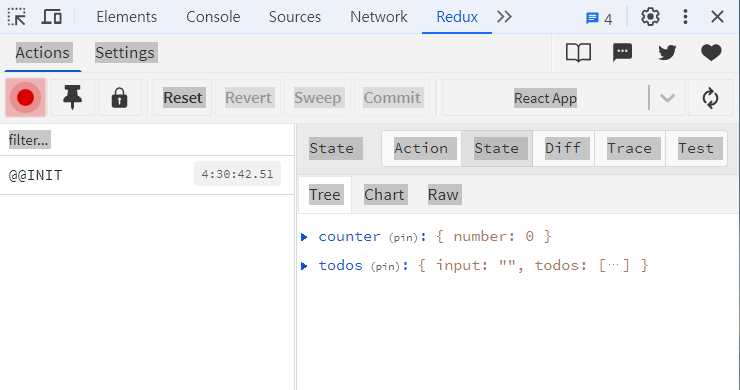

## 17.4 컨테이너 컴포넌트 만들기
1. CounterContainer 만들기
```js
import React from 'react';
import Counter from '../components/Counter';
import { connect } from 'react-redux';
import { increase, decrease } from '../modules/counter';

const CounterContainer = ({ number, increase, decrease }) => {
  return (
    <Counter number={number} onIncrease={increase} onDecrease={decrease} />
  );
};

const mapStateToProps = (status) => ({
  number: status.counter.number,
});

const mapDispatchToProps = (dispatch) => ({
  increase: () => {
    dispatch(increase());
  },
  decrease: () => {
    dispatch(decrease());
  },
});
export default connect(mapStateToProps, mapDispatchToProps)(CounterContainer);
```
- connect 함수를 사용할 때는 일반적으로 위 코드와 같이 mapStateToProps와 mapDispatchToProps를 미리 선언해 놓고 사용합니다. 
- 하지만 connect 함수 내부에 익명 함수 형태로 선언해도 문제가 되지 않습니다. 
- 취향에 따라 다음과 같이 작성해도 된다.
```js
import React from 'react';
import Counter from '../components/Counter';
import { connect } from 'react-redux';
import { increase, decrease } from '../modules/counter';

const CounterContainer = ({ number, increase, decrease }) => {
  return (
    <Counter number={number} onIncrease={increase} onDecrease={decrease} />
  );
};

export default connect(
  (status) => ({
    number: status.counter.number,
  }),
  (dispatch) => ({
    increase: () => dispatch(increase()),
    decrease: () => dispatch(decrease()),
  }),
)(CounterContainer);
```
- 액션 생성 함수를 호출하여 디스패치 하는 코드가 한줄이기 때문에 불피요한 코드 블록을 생략해 주었다.

-컴포넌트에서 액션을 디스패치하기 위해 각 액션 생성 함수를 호출하고 dispatch로 감싸는 작업이 조금 번거로울 수도 있습니다.
- 리덕스에서 제공하는 bindActionCreators 유틸 함수를 사용하면 간편
```js
import React from 'react';
import Counter from '../components/Counter';
import { connect } from 'react-redux';
import { bindActionCreators } from 'redux';
import { increase, decrease } from '../modules/counter';

const CounterContainer = ({ number, increase, decrease }) => {
  return (
    <Counter number={number} onIncrease={increase} onDecrease={decrease} />
  );
};

export default connect(
  (status) => ({
    number: status.counter.number,
  }),
  (dispatch) =>
    bindActionCreators(
      {
        increase,
        decrease,
      },
      dispatch,
    ),
)(CounterContainer);
```
- mapDispatchToProps에 해당하는 파라미터를 함수 형태가 아닌 액션 생성 함수로 이루어진 객체 형태로 넣어 주는 방식도 존재
```js
import React from 'react';
import Counter from '../components/Counter';
import { connect } from 'react-redux';
import { increase, decrease } from '../modules/counter';

const CounterContainer = ({ number, increase, decrease }) => {
    return (
        <Counter number={number} onIncrease={increase} onDecrease={decrease} />
    );
};
  
export default connect(
    (status) => ({
        number: status.counter.number,
    }),
    {
        increase,
        decrease
    }
)(CounterContainer);
```
- 위와 같이 두 번째 파라미터를 아예 객체 형태로 넣어 주면 connect 함수가 내부적으로 bindActionCreators 작업을 대신한다.

2. TodosContainer 만들기
- todos 모듈에서 작성했던 액션 생성 함수와 상태 안에 있던 값을 컴포넌트의 props로 전달
```js
import React from 'react';
import { connect } from 'react-redux';
import { changeInput, insert, toggle, remove } from '../modules/todos';
import Todos from '../components/Todos';

const TodosContainer = ({
    input,
    todos,
    changeInput,
    insert,
    toggle,
    remove,
}) => {
    return (
        <Todos
            input={input}
            todos={todos}
            onChangeInput={changeInput}
            onInsert={insert}
            onToggle={toggle}
            onRemove={remove}
        />
    );
};

export default connect(
    // 비구조화 할당을 통해 todos를 분리하여
    // state.todos.input 대신 todos.input 사용
    ({ todos }) => ({
        input: todos.input,
        todos: todos.todos,
    }),
    {
        changeInput,
        insert,
        toggle,
        remove,
    },
)(TodosContainer);
```
---
```js
const TodoItem = ({ todo, onToggle, onRemove }) => {
    return (
        <div>
        <input
            type="checkbox"
            onClick={() => onToggle(todo.id)}
            checked={todo.done}
            readOnly={true}
        />
        <span style={{ textDecoration: todo.done ? 'line-through' : 'none' }}>
            {todo.text}
        </span>
        <button onClick={() => onRemove(todo.id)}>삭제</button>
        </div>
    );
};

const Todos = ({
    // 인풋에 입력되는 텍스트
    input, 
    // 할일 목록이 들어 있는 객체
    todos, 
    onChangeInput,
    onInsert,
    onToggle,
    onRemove,
}) => {
    const onSubmit = (e) => {
        e.preventDefault();
        onInsert(input);
        // 등록 후 인풋 초기화
        onChangeInput(''); 
    };
    const onChange = (e) => onChangeInput(e.target.value);
    return (
        <div>
            <form onSubmit={onSubmit}>
                <input value={input} onChange={onChange} />
                <button type="submit">등록</button>
            </form>
            <div>
                {todos.map((todo) => (
                <TodoItem
                    todo={todo}
                    key={todo.id}
                    onToggle={onToggle}
                    onRemove={onRemove}
                />
                ))}
            </div>
        </div>
    );
};
export default Todos;
```
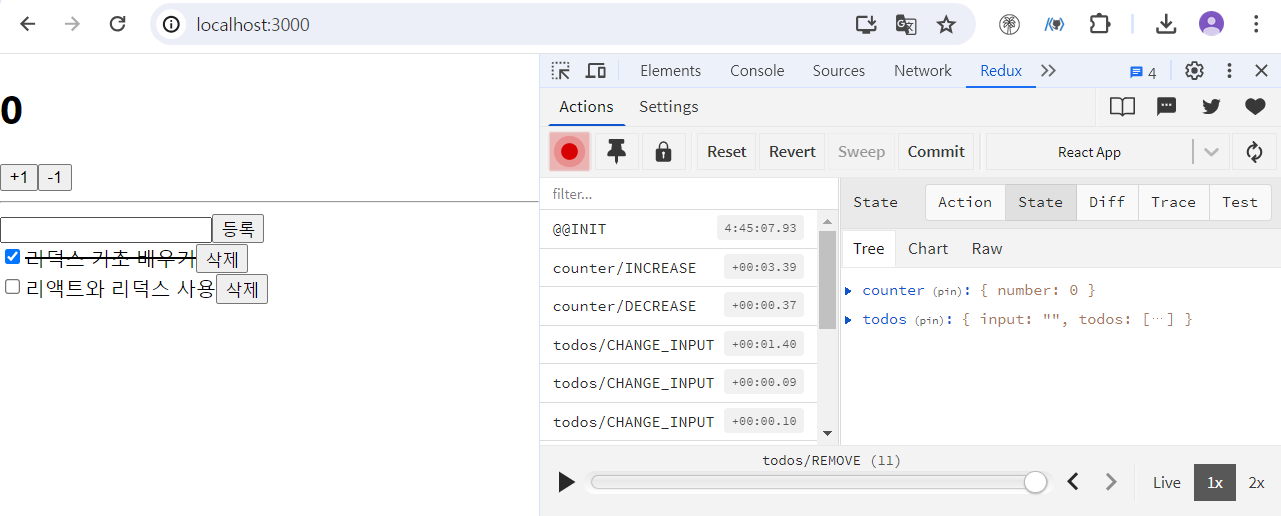

## 17.5 리덕스 더 편하게 사용하기
- 액션 생성 함수, 리듀서를 작성할 때 redux-actions라는 라이브러리와 이전에 배웟던 immer 라이브러리를 활용하면 리덕스를 훨씬 편하게 사용할 수 있다.

1. redux-actions
- redux-actions를 사용하면 액션 생성 함수를 더 짧은 코드로 작성할 수 있다
- 리듀서를 작성할 때도 switch/case 문이 아닌 handleActions라는 함수를 사용하여 각 액션마다 업데이트 함수를 설정하는 형식으로 작성해 줄 수 있다
- yarn add redux-actions
- counter 모듈에 적용
    ```js
    import { createAction, handleActions } from 'redux-actions';

    const INCREASE = 'counter/INCREASE';
    const DECREASE = 'counter/DECREASE';

    export const increase = createAction(INCREASE);
    export const decrease = createAction(DECREASE);

    const initialState = {
    number: 0,
    };

    const counter = handleActions({
    [INCREASE] : (state, action) => ({number: state.number +1}),
    [DECREASE] : (state, action) => ({number: state.number -1}),
    },initialState)

    export default counter;
    ```
- todos 모듈에 적용
    - 먼저 액션 생성 함수를 교체해 줄 텐데, 조금 다른 점 존재. 
    - 각 액션 생성 함수에서 파라미터를 필요로 한다는 점입니다.
    - createAction으로 액션을 만들면 액션에 필요한 추가 데이터는 payload라는 이름을 사용
    - 액션 생성 함수에서 받아 온 파라미터를 그대로 payload에 넣는 것이 아니라 변형을 주어서 넣고 싶다면, createAction의 두 번째 함수에 payload를 정의하는 함수를 따로 선언해서 넣어 준다
    ```js
    import { createAction, handleActions } from 'redux-actions';

    // 액션 타입 정의
    const CHANGE_INPUT = 'todos/CHANGE_INPUT'; 
    const INSERT = 'todos/INSERT'; 
    const TOGGLE = 'todos/TOGGLE'; 
    const REMOVE = 'todos/REMOVE'; 

    // 액션 생성자 함수 정의
    export const changeInput = createAction(CHANGE_INPUT, (input) => input);

    let id = 3; 
    export const insert = createAction(INSERT, (text) => ({
        id: id++,
        text,
        done: false,
    }));

    export const toggle = createAction(TOGGLE, (id) => id);
    export const remove = createAction(REMOVE, (id) => id);

    // 초기 상태 정의
    const initialState = {
    input: '',
    todos: [
        {
        id: 1,
        text: '리덕스 기초 배우기',
        done: true
        },
        {
        id: 2,
        text: '리액트와 리덕스 사용하기',
        done: false
        }
    ]
    };

    // 리듀서 정의
    const todos = handleActions(
        {
            [CHANGE_INPUT]: (state, { payload: input }) => ({ ...state, input }),
            [INSERT]: (state, { payload: todo }) => ({
                ...state,
                todos: state.todos.concat(todo),
            }),
            [TOGGLE]: (state, { payload: id }) => ({
                ...state,
                todos: state.map((todo) =>
                    todo.id === id ? { ...todo, done: !todo.done } : todo,
                ),
            }),
            [REMOVE]: (state, { payload: id }) => ({
                ...state,
                todos: state.filter((todo) => todo.id !== id),
            }),
        },
        initialState,
    );

    export default todos;
    ```

2. immer
- 리듀서에서 상태를 업데이트 할 때는 불변성을 지켜야 하기 때문에 앞에서는 spread 연산자(...)와 배열의 내장 함수를 활용
- 그러나 모듈의 상태가 복잡해질수록 불변성을 지키기가 까다롭다
- 따라서 모듈의 상태를 설계할 때는 객체의 깊이가 너무 깊어지지 않도록 주의해야 합니다. 
- yarn add immer
    ```js
    import { createAction, handleActions } from 'redux-actions';
    import {produce} from 'immer';

    // 액션 타입 정의
    const CHANGE_INPUT = 'todos/CHANGE_INPUT'; 
    const INSERT = 'todos/INSERT'; 
    const TOGGLE = 'todos/TOGGLE'; 
    const REMOVE = 'todos/REMOVE'; 

    // 액션 생성자 함수 정의
    export const changeInput = createAction(CHANGE_INPUT, (input) => input);

    let id = 3; 
    export const insert = createAction(INSERT, (text) => ({
        id: id++,
        text,
        done: false,
    }));

    export const toggle = createAction(TOGGLE, (id) => id);
    export const remove = createAction(REMOVE, (id) => id);

    // 초기 상태 정의
    const initialState = {
    input: '',
    todos: [
        {
        id: 1,
        text: '리덕스 기초 배우기',
        done: true
        },
        {
        id: 2,
        text: '리액트와 리덕스 사용하기',
        done: false
        }
    ]
    };

    // 리듀서 정의
    const todos = handleActions(
        {
            [CHANGE_INPUT]: (state, { payload: input }) =>
                produce(state, (draft) => {
                    draft.input = input;
                }),
            [INSERT]: (state, { payload: todo }) =>
                produce(state, (draft) => {
                    draft.todos.push(todo);
                }),
            [TOGGLE]: (state, { payload: id }) =>
                produce(state, (draft) => {
                    const todo = draft.todos.find((todo) => todo.id === id);
                    todo.done = !todo.done;
                }),
            [REMOVE]: (state, { payload: id }) =>
                produce(state, (draft) => {
                    const index = draft.todos.findIndex((todo) => todo.id === id);
                    draft.todos.splice(index, 1);
                }),
        },
        initialState,
    );

    export default todos;
    ```
    - immer를 사용한다고 해서 모든 업데이트 함수에 immer를 적용할 필요는 없다
    - 일반 자바스크립트로 처리하는 것이 더 편할 때는 immer를 적용하지 않아도 된다
    - 예를 들어 위 코드에서 TOGGLE을 제외한 업데이트 함수들은 immer를 쓰지 않는 코드가 오히려 더 짧기 때문에 이전 형태를 유지하는 것도 무방

## 17.6 Hooks를 사용하여 컴테이너 컴포넌트 만들기
- 리덕스 스토어와 연동된 컨테이너 컴포넌트를 만들 때 connect 함수를 사용하는 대신 react-redx에서 제공하는 Hooks를 사용할 수 있다

1. useSelector로 상태 조회하기
- useSelector Hook을 사용하면 connect 함수를 사용하지 않고도 리덕스의 상태를 조회할 수 있다
- CounterContainer에서 connect 함수 대신 useSelector를 사용하여 counter.number 값을 조회함으로써 Counter에게 props를 넘겨 주기
    ```js
    import React from 'react';
    import Counter from '../components/Counter';
    import { useSelector } from 'react-redux';

    const CounterContainer = () => {
        const number = useSelector((status) => status.counter.number);
        return <Counter number={number} />;
    };

    export default CounterContainer;
    ```

2. useDispatch를 사용하여 액션 디스패치하기
- 이 Hook은 컴포넌트 내부에서 스토어의 내장 함수 dispatch를 사용할 수 있게 해준다.
- 컨테이너 컴포넌트에서 액션을 디스패치해야 한다면 이 Hook을 사용하면 된다.
- CounterContainer에서도 이 Hook을 사용하여 INCREASE와 DECREASE 액션을 발생 시키기
    ```js
    import React from 'react';
    import Counter from '../components/Counter';
    import { useDispatch, useSelector } from 'react-redux';
    import { increase, decrease } from '../modules/counter';

    const CounterContainer = () => {
        const number = useSelector((status) => status.counter.number);
        const dispatch = useDispatch();
        return (
            <Counter
                number={number}
                onIncrease={() => dispatch(increase())}
                onDecrease={() => dispatch(decrease())}
            />
        );
    };

    export default CounterContainer;
    ```                 
- 지금은 숫자가 바귀어서 컴포넌트가 리렌더링될 때마다 onIncrease 함수와 onDecrease 함수가 새롭게 만들어지고 있다
- 만약 컴포넌트 성능을 최적화해야 하는 상황이 온다면 useCallback으로 액션을 디스패치하는 함수를 감사 주는 것이 좋음
- 수정
    ```js
    import Counter from '../components/Counter';
    import { useDispatch, useSelector } from 'react-redux';
    import { increase, decrease } from '../modules/counter';
    import { useCallback } from 'react';

    const CounterContainer = () => {
        const number = useSelector((status) => status.counter.number);
        const dispatch = useDispatch();
        const onIncrease = useCallback(() => dispatch(increase()),[dispatch]);
        const onDecrease = useCallback(() => dispatch(decrease()),[dispatch]);
        return (
            <Counter number={number} onIncrease={onIncrease} onDecrease={onDecrease}/>
        );
    };

    export default CounterContainer;
    ```

3. useStore를 사용하여 리덕스 스토어 사용
- useStore Hooks를 사용하면 컴포넌트 내부에서 리덕스 스토어 객체를 직접 사용할 수 있습니다.
    ```js
    const store = useStore();
    store.dispatch({ type : 'SAMPE_ACTION' });
    store.getState();
    ```

4. TodosContainer를 Hooks로 전환
- TodosContainer를 connect 함수 대신에 useSelector와 useDospatch Hooks를 사용하는 형태로 전환
    ```js
    import React, { useCallback } from 'react';
    import { useSelector, useDispatch } from 'react-redux';
    import { changeInput, insert, toggle, remove } from '../modules/todos';
    import Todos from '../components/Todos';

    const TodosContainer = () => {
        const { input, todos } = useSelector(({ todos }) => ({
            input: todos.input,
            todos: todos.todos,
        }));
        const dispatch = useDispatch();
        const onChangeInput = useCallback(
            (input) => dispatch(changeInput(input)),
            [dispatch],
        );
        const onInsert = useCallback((text) => dispatch(insert(text)), [dispatch]);
        const onToggle = useCallback((id) => dispatch(toggle(id)), [dispatch]);
        const onRemove = useCallback((id) => dispatch(remove(id)), [dispatch]);

        return (
            <Todos
                input={input}
                todos={todos}
                onChangeInput={onChangeInput}
                onInsert={onInsert}
                onToggle={onToggle}
                onRemove={onRemove}
            />
        );
    };

    export default TodosContainer;
    ```
- useSelector를 사용할 때 비 구조화 할당 문법을 활용
- useDispatch를 사용할 때 각 액션을 디스패치하는 함수를 만듬
- 위 코드의 경우 액션의 종류가 많은데 어떤 값이 액션 생성 함수의 파라미터로 사용되어야 하는지 일일이 명시해 주어야 하므로 조금 번거롭다

5. useActions 유틸 Hook을 만들어서 사용하기
- useActions는 원래 react-redux에 내장된 상태로 릴리즈될 계획이었으나 리덕스 개발 팀에서 꼭 필요하지 않다고 판단하여 제외된 Hook
- 대신 공식 문서에서 그대로 복사하여 사용할 수 있도록 제공하고 있습니다.
    - 참고링크 https://react-redux.js.org/next/api/hooks#recipe-useactions
```js
import { bindActionCreators } from 'redux';
import { useDispatch } from 'react-redux';
import { useMemo } from 'react';

export default function useActions(actions, deps) {
    const dispatch = useDispatch();
    return useMemo(
        () => {
        if (Array.isArray(actions)) {
            return actions.map(a => bindActionCreators(a, dispatch));
        }
        return bindActionCreators(actions, dispatch);
        },
        deps ? [dispatch, ...deps] : deps
    );
}
```
- useActions Hook은 액션 생성 함수를 액션을 디스패치하는 함수로 변환해 준다
- 액션 생성 함수를 사용하여 액션 객체를 만들고, 이를 스토어에 디스패치하는 작업을 해주는 함수를 자동으로 만들어 줌
- useActions는 두 가지 파라미터가 필요
    - 첫 번째 파라미터는 액션 생성 함수로 이루어진 배열
    - 두 번째 파라미터는 deps 배열. 배열 안에 들어 있는 원소가 바뀌면 액션을 디스패치하는 함수를 새로 만듦
```js
import React from 'react';
import { useSelector } from 'react-redux';
import { changeInput, insert, toggle, remove } from '../modules/todos';
import Todos from '../components/Todos';
import useActions from '../lib/useActions';

const TodosContainer = () => {
    const { input, todos } = useSelector(({ todos }) => ({
        input: todos.input,
        todos: todos.todos,
    }));

    const [onChangeInput, onInsert, onToggle, onRemove] = useActions(
        [changeInput, insert, toggle, remove],
        [],
    );
    return (
        <Todos
            input={input}
            todos={todos}
            onChangeInput={onChangeInput}
            onInsert={onInsert}
            onToggle={onToggle}
            onRemove={onRemove}
        />
    );
};

export default TodosContainer;
```

6. connect 함수와의 주요 차이점
- 앞으로 컨테이너 컴포넌트를 만들 때 connect 함수를 사용하거나, useSelector와  useDispatch를 사용해도 좋다
- 리덕스 관련 Hook이 있다고 해서 기존 connect 함수가 사라지는 것은 아니므로, 더 편한 것을 사용
- Hooks를 사용하여 컨테이너 컴포넌트를 만들 때 잘 알아 두어야 할 차이점
    - connect 함수를 사용하여 컨테이너 컴포넌트를 만들었을 경우, 해당 컨테이너 컴포넌트의 부모 컴포넌트가 리렌더링 될 때 해당 컨테이너 컴포넌트의 props가 바뀌지 않았다면 리렌더링이 자동으로 방지되어 성능이 최적화 된다.
    - useSelector를 사용하여 리덕스 상태를 조회했을 때는 이 최적화 작업이 자동으로 이루어지지 않으므로, 성능 최적화를 위해서는 React.memo를 컨테이너 컴포넌트에 사용해 주어야 한다
        ```js
        import React from 'react';
        import { useSelector } from 'react-redux';
        import { changeInput, insert, toggle, remove } from '../modules/todos';
        import Todos from '../components/Todos';
        import useActions from '../lib/useActions';

        const TodosContainer = () => {
            const { input, todos } = useSelector(({ todos }) => ({
                input: todos.input,
                todos: todos.todos,
            }));

            const [onChangeInput, onInsert, onToggle, onRemove] = useActions(
                [changeInput, insert, toggle, remove],
                [],
            );
            return (
                <Todos
                    input={input}
                    todos={todos}
                    onChangeInput={onChangeInput}
                    onInsert={onInsert}
                    onToggle={onToggle}
                    onRemove={onRemove}
                />
            );
        };

        export default React.memo(TodosContainer);
        ```

## 17.7 정리
- 리액트 프로젝트에 리덕스를 적용하여 사용하는 방법을 배움
- 리액트 프로젝트에서 리덕스를 사용하면 업데이트에 관련된 로직을 리액트 컴포넌트에서 완벽하게 분리시킬 수 있으므로 유지 보수성이 높은 코드를 작성해 낼 수 있다
- 사실 이번에 만든 프로젝트처럼 정말 작은 프로젝트에 리덕스를 적용하면 오히려 프로젝트의 복잡도가 높아질 수 있다. 하지만 규모가 큰 프로젝트에 리덕스를 적용하면 상태를 더 체계적으로 관리할 수 있고, 개발자 경험도 향상시켜 준다.